<a href="https://colab.research.google.com/github/akumar98630/lambton/blob/main/Assignment_5_Akash_Kumar_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [11]:
#load dataset
df = pd.read_csv('StudentsPerformance.csv')

In [12]:
# Preview
print(df.head())
print(df.info())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtyp

In [13]:
# Separate features and target
X = df.drop(columns=['math score'])
y = df['math score']

In [14]:
# Identify categorical columns
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

In [15]:
# One-Hot Encoding
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

X_encoded = ct.fit_transform(X)

In [16]:
# Get feature names
encoded_cols = ct.named_transformers_['encoder'].get_feature_names_out(categorical_cols)
all_features = list(encoded_cols) + ['reading score', 'writing score']

# Convert to DataFrame
X_df = pd.DataFrame(X_encoded, columns=all_features)

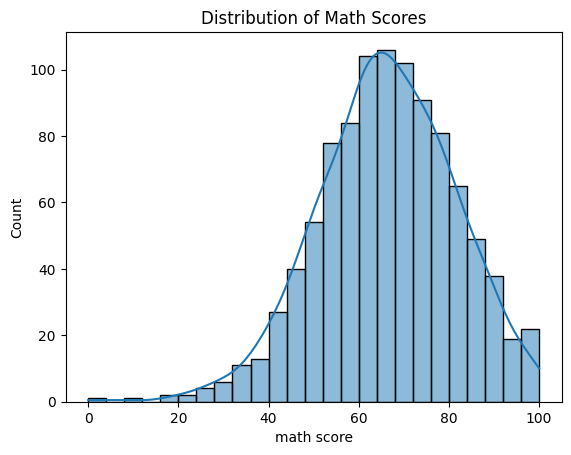

In [17]:
# Distribution of math scores
sns.histplot(df['math score'], kde=True)
plt.title("Distribution of Math Scores")
plt.show()

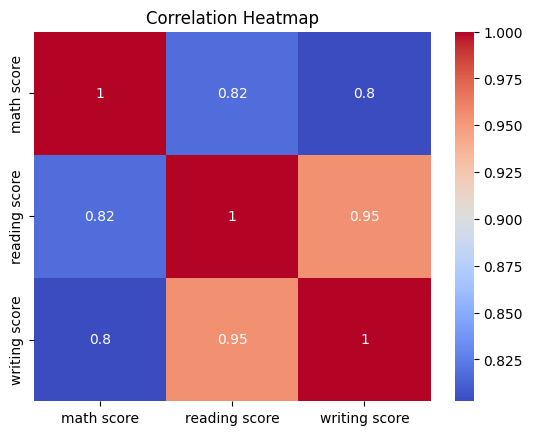

In [18]:
# Correlation heatmap
sns.heatmap(df[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [19]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)


In [20]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predict
y_pred = model.predict(X_test)

In [22]:
# Evaluate
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.8804332983749564
MAE: 4.214763142474852
RMSE: 5.393993869732845


In [23]:
# Test preparation effect
prep_effect = df.groupby('test preparation course')['math score'].mean()
print("\nMath Score by Test Preparation Course:\n", prep_effect)


Math Score by Test Preparation Course:
 test preparation course
completed    69.695531
none         64.077882
Name: math score, dtype: float64


In [24]:
# Parental education effect
edu_effect = df.groupby('parental level of education')['math score'].mean()
print("\nMath Score by Parental Education Level:\n", edu_effect)


Math Score by Parental Education Level:
 parental level of education
associate's degree    67.882883
bachelor's degree     69.389831
high school           62.137755
master's degree       69.745763
some college          67.128319
some high school      63.497207
Name: math score, dtype: float64


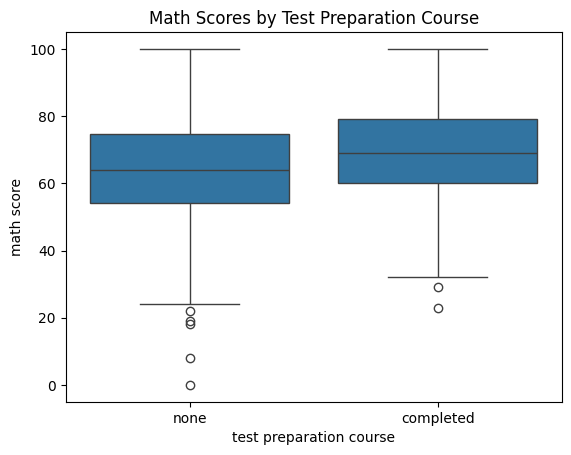

In [25]:
# Plot effects
sns.boxplot(x='test preparation course', y='math score', data=df)
plt.title("Math Scores by Test Preparation Course")
plt.show()

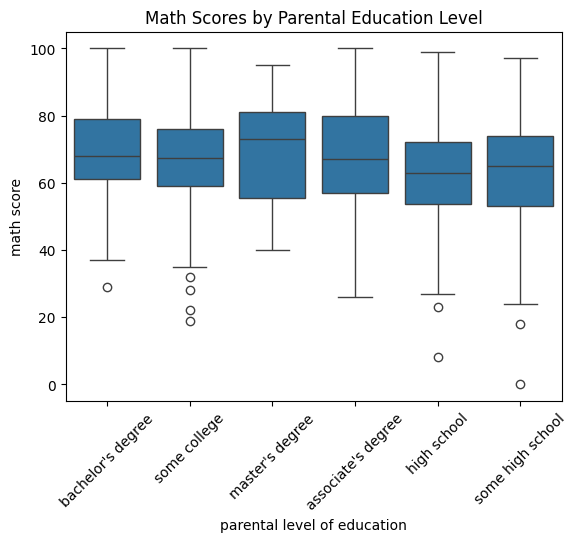

In [26]:
sns.boxplot(x='parental level of education', y='math score', data=df)
plt.xticks(rotation=45)
plt.title("Math Scores by Parental Education Level")
plt.show()

In [27]:
# Build separate models for each gender
for gender in df['gender'].unique():
    print(f"\n--- Gender: {gender} ---")
    df_gender = df[df['gender'] == gender]

    X = df_gender.drop(columns=['math score'])
    y = df_gender['math score']

    X_encoded = ct.transform(X)
    X_df = pd.DataFrame(X_encoded, columns=all_features)

    X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("R² Score:", r2_score(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


--- Gender: female ---
R² Score: 0.9000728204155696
MAE: 4.419252682145406
RMSE: 5.479252194803445

--- Gender: male ---
R² Score: 0.8523343299308627
MAE: 4.539428504758009
RMSE: 5.415215562639075
